In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Balancing And Splitting Data

In [ ]:
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
data = pd.read_csv('IMDB Dataset.csv')
count_positive,count_negative = data['sentiment'].value_counts()
class_positive=data[data['sentiment'] == 'positive']
class_negative=data[data['sentiment'] == 'negative']
class_positive_under = class_positive.sample(count_negative)
balanced_data = pd.concat([class_positive_under,class_negative])
allData = balanced_data.iloc[:,0:1]
targets = balanced_data.iloc[:,-1:]
training_data_review1, testing_data_review1,training_data_sentiment,testing_data_sentiment = train_test_split(allData,targets, test_size=0.2, random_state=70)
training_data_review,testing_data_review,training_data_val,testing_data_val = train_test_split(training_data_review1,training_data_sentiment,test_size=0.125,random_state=70)
training_data_review['tokenized'] = training_data_review['review'].apply(word_tokenize)

training_data_review['review_lowercase']=training_data_review['tokenized'].apply(lambda x : [word.lower() for word in x])
print(training_data_review['review_lowercase'])
punc = string.punctuation
training_data_review['no_punc']=training_data_review['review_lowercase'].apply(lambda x: [word for word in x if word not in punc])
print(training_data_review['no_punc'])
stop_words = set(stopwords.words('english'))
training_data_review['stopwords_removed'] = training_data_review['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
training_data_review.head()
training_data_review['pos_tags'] = training_data_review['stopwords_removed'].apply(nltk.tag.pos_tag)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


training_data_review['wordnet_pos'] = training_data_review['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
wnl = WordNetLemmatizer()
training_data_review['lemmatized'] = training_data_review['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
training_data_review['sentiment']=training_data_sentiment


12592    [i, walk, out, of, very, few, movie, screenings, and, this, movie, managed, to, become, one, of,...
17224    [i, saw, this, film, at, the, chicago, reeling, film, festival, ., to, pick, up, on, the, previo...
21672    [saw, a, trailer, for, this, on, another, video, ,, and, decided, to, rent, when, it, came, out,...
46379    [i, watched, grendel, the, other, night, and, am, compelled, to, put, together, a, public, servi...
8216     [naturally, in, a, film, who, 's, main, themes, are, of, mortality, ,, nostalgia, ,, and, loss, ...
                                                        ...                                                 
42347    [director, alfred, green, 's, melodrama, ``, baby, face, '', with, barbara, stanwyck, ranks, as,...
9253     [i, find, it, so, amazing, that, even, after, all, these, years, ,, we, are, still, talking, abo...
46525    [if, you, liked, ``, blair, with, '', you, 'll, like, this, one, ., it, has, the, same, lousy, c...
32386    [there, is

#Decision Tree

In [ ]:
training_data_review['sentiment']=training_data_sentiment
training_data_review.head()

#decision_tree =  DecisionTreeClassifier(criterion='entropy',random_state=40)
#decision_tree_model = decision_tree.fit(training_data_all,training_data_target)
#predict_for_target_decision_tree = decision_tree_model.predict(testing_data_all)

#confusion_matrix_decision_tree = confusion_matrix(testing_data_target,predict_for_target_decision_tree)
#disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_decision_tree,display_labels=decision_tree.classes_)
#accuracy_score_decision_tree = accuracy_score(testing_data_target,predict_for_target_decision_tree)
#classification_report_decision_tree = classification_report(testing_data_target,predict_for_target_decision_tree)
#Decision Tree Data
#print("The Accuracy of the decision tree model " ,accuracy_score_decision_tree,"\n")
#print(classification_report_decision_tree)
#disp.plot()
#plt.show()

NameError: ignored

#AdaBoost

In [ ]:
n_range = list(range(10, 100,10))
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(training_data_all,training_data_target);
best_estimator_adaBoost=grid.best_estimator_

The accuracy of adaBoost is  0.8185895838524795 

              precision    recall  f1-score   support

           g       0.82      0.82      0.82      2011
           h       0.82      0.81      0.82      2002

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013



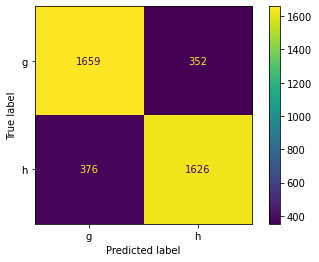

In [ ]:
adaBoostClassifier = best_estimator_adaBoost
adaBoostClassifier_model = adaBoostClassifier.fit(training_data_all,training_data_target)

predict_for_target_adaBoost = adaBoostClassifier_model.predict(testing_data_all)
confusion_matrix_adaBoost = confusion_matrix(testing_data_target,predict_for_target_adaBoost)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_adaBoost,display_labels=adaBoostClassifier.classes_)
accuracy_score_adaBoost = accuracy_score(testing_data_target,predict_for_target_adaBoost)
classification_report_adaBoost = classification_report(testing_data_target,predict_for_target_adaBoost)

#AdaBoost data
print("The accuracy of adaBoost is ",accuracy_score_adaBoost,"\n")
print(classification_report_adaBoost)
disp.plot()
plt.show()

#Random Forest

In [ ]:
n_range = list(range(10, 120,10))
param_grid = dict(n_estimators=n_range)
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(training_data_all,training_data_target);
best_estimator_random_forest=grid.best_estimator_

The accuracy of Random Forest is  0.8587091951158734 

              precision    recall  f1-score   support

           g       0.84      0.89      0.86      2011
           h       0.88      0.83      0.85      2002

    accuracy                           0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013



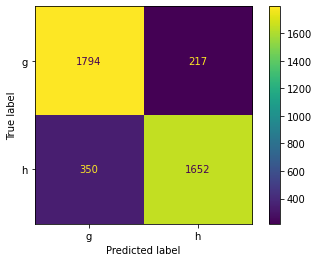

In [ ]:
random_forest = best_estimator_random_forest
random_forest_predictor = random_forest.fit(training_data_all,training_data_target.values.ravel())
random_forest_test_predictions = random_forest_predictor.predict(testing_data_all)

# calculating metrics
random_forest_confusion_matrix = confusion_matrix(testing_data_target,random_forest_test_predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=random_forest_confusion_matrix,display_labels=random_forest.classes_)
random_forest_accuracy = accuracy_score(testing_data_target,random_forest_test_predictions)
random_forest_classification_report = classification_report(testing_data_target,random_forest_test_predictions)

# printing metrics
print("The accuracy of Random Forest is ",random_forest_accuracy,"\n")
print(random_forest_classification_report)

disp.plot()
plt.show()






#Naive Bayes

##Naive Bayes Model Training

In [ ]:
model=GaussianNB()
model.fit(training_data_all,training_data_target);

##Naive Bayes Model Testing

In [ ]:
predicted=model.predict(testing_data_all.to_numpy());

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


##Naive Bayes Model Evaluation Metrics

The accuracy of Naive Bayes is  0.6573635684026913
              precision    recall  f1-score   support

           g       0.61      0.90      0.72      2011
           h       0.80      0.41      0.55      2002

    accuracy                           0.66      4013
   macro avg       0.71      0.66      0.64      4013
weighted avg       0.71      0.66      0.64      4013



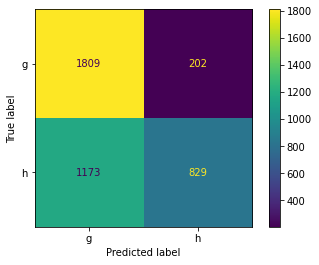

In [ ]:
test_label_as_array=testing_data_target.to_numpy()
labels=model.classes_

accuracy=accuracy_score(test_label_as_array,predicted)
conf_mat=confusion_matrix(test_label_as_array,predicted,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=labels)
naive_bayes_classification_report=classification_report(testing_data_target,predicted)
print("The accuracy of Naive Bayes is ",accuracy)
print(naive_bayes_classification_report)
disp.plot()
plt.show()

#K-Nearest Neighbours

In [ ]:
#Scaling the data
scaler=StandardScaler()
scaled_training_data=scaler.fit_transform(training_data_all)
scaled_testing_data=scaler.fit_transform(testing_data_all)

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=20, scoring='accuracy')
grid.fit(scaled_training_data,training_data_target);
best_estimator_knn=grid.best_estimator_

The accuracy of KNN is  0.8101171193620733 

              precision    recall  f1-score   support

           g       0.76      0.90      0.83      2011
           h       0.88      0.72      0.79      2002

    accuracy                           0.81      4013
   macro avg       0.82      0.81      0.81      4013
weighted avg       0.82      0.81      0.81      4013



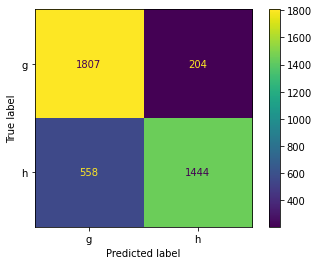

In [ ]:
k_nearest_Neighbours =best_estimator_knn
result_k_nearest_Neighbours = k_nearest_Neighbours.fit(scaled_training_data,training_data_target)
predict_for_target_k_nearest = result_k_nearest_Neighbours.predict(scaled_testing_data)

confusion_matrix_result_k_nearest = confusion_matrix(testing_data_target,predict_for_target_k_nearest)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result_k_nearest,display_labels=k_nearest_Neighbours.classes_)
accuracy_score_result_k_nearest = accuracy_score(testing_data_target,predict_for_target_k_nearest)
classification_report_result_k_nearest = classification_report(testing_data_target,predict_for_target_k_nearest)
#K- Nearest Neighbours data
print("The accuracy of KNN is ",accuracy_score_result_k_nearest,"\n")
print(classification_report_result_k_nearest)
disp.plot()
plt.show()

#Neural Network With 2 Layers

##Preprocessing

In [ ]:
training_data_target.replace({'g': 0,'h': 1},inplace=True)

In [ ]:
testing_data_target.replace({'g':0,'h':1},inplace=True)

In [ ]:
y_train=training_data_target
y_test=testing_data_target
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

##Building The Neural Network

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self,n_features):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(n_features, 68) 
        self.layer_2 = nn.Linear(68, 30)
        self.layer_out = nn.Linear(30, 1) 
  
        
    def forward(self, data):
      data=F.relu(self.layer_1(data))
      data=F.relu(self.layer_2(data))
      return torch.sigmoid(self.layer_out(data))
        

In [ ]:
net=BinaryClassification(scaled_training_data.shape[1])

#Training

In [ ]:
criterion=nn.BCELoss()

In [ ]:
optimizer=optim.Adam(net.parameters(),lr=0.001)

In [ ]:
def calculate_accuracy(y_true,y_pred):
  predicted=y_pred.ge(.5).view(-1)
  return (y_true==predicted).sum().float()/len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(10000):
    y_pred = net(torch.from_numpy(scaled_training_data).float())
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

In [ ]:
y_test_pred = net(torch.from_numpy(scaled_testing_data).float())
y_test_pred = torch.squeeze(y_test_pred)
test_loss = criterion(y_test_pred, y_test)
test_acc = calculate_accuracy(y_test, y_test_pred)
print('The accuracy of the neural network is ',test_acc)

The accuracy of the neural network is  tensor(0.8084)


In [ ]:
classes=['g','h']
y_pred= net(torch.from_numpy(scaled_testing_data).float())
y_pred=y_pred.ge(.5).view(-1)
net_classification_report=classification_report(y_test,y_pred,target_names=classes)
print(net_classification_report)

              precision    recall  f1-score   support

           g       0.78      0.85      0.82      2011
           h       0.84      0.76      0.80      2002

    accuracy                           0.81      4013
   macro avg       0.81      0.81      0.81      4013
weighted avg       0.81      0.81      0.81      4013



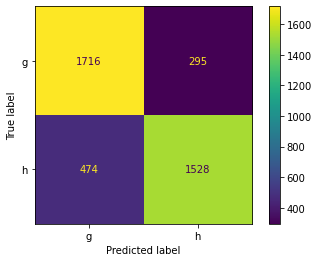

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=classes)
disp.plot()
plt.show()